Hammad Saeed <br>
</br>

[ww.hammad.fun](https://www.hammad.fun) <br/>
hammad@supportvectors.com


# LLM Textbook Generator
*for SupportVectors LLM Bootcamp 2* <br/>
*also a library demo*

### Requirements
While making this project, I accidentally ended up writing a library instead. So thankfully all the dependencies are included in the library. <br />
HammadPy is a fun little 'toolkit' with a bunch of really niche features. The source code on the github link provides documentation.

```python
    pip install hammadpy
    # https://github.com/hsaeed3/hammad-python
```

In [21]:
# Install it using the following command
! pip install -q hammadpy --upgrade

In [1]:
from hammadpy import HammadPy, LLM

# Create an instance of HammadPy
# Contains Base Tools
HammadPy = HammadPy()

# LLM Instance
# Currently only configured with OpenAI 
ai = LLM(key="")

# COSTAR Example

## Preferences
<br/>

- **USER_SUBJECT** = The subject to generate the textbook on. (Biology, History, etc..)
- **USER_LEVEL** = The level to generate the textbook on. (2nd Grade, PhD, Beginner, etc..)
<br/>

- **USER_NUM_CHAPTERS** = The amount of chapters to generate.
- **USER_NUM_SECTIONS** = The amount of sections to include in each chapter.
- **USER_SECTION_LENGTH** = The section length (in words).
- **USER_QUIZ_LENGTH** = The amount of questions to generate in each chapter quiz.

In [3]:
USER_SUBJECT : str = "The Impact of Quantum Field Theory and How it Affects Our Understanding of the Universe"
USER_LEVEL : str = "Pre-School"

USER_NUM_CHAPTERS : int = 10
USER_NUM_SECTIONS : int = 5
USER_SECTION_LENGTH : int = 30
USER_NUM_QUESTIONS : int = 3

# HammadPy.say()
# Easy to use styled CLI output
#   HammadPy.say("message", "color (optional)", "style (optional)")
HammadPy.say(f"Creating a new {USER_SUBJECT} textbook for {USER_LEVEL} students")
HammadPy.say(f"Creating {USER_NUM_CHAPTERS} chapters with {USER_NUM_SECTIONS} sections each", "green")
HammadPy.say(f"Each section will be {USER_SECTION_LENGTH} pages long", "blue", "bold")
HammadPy.say(f"Each chapter will have {USER_NUM_QUESTIONS} questions", "magenta", "bold")

Creating a new The Impact of Quantum Field Theory and How it Affects Our Understanding of the Universe textbook for Pre-School students
Creating 10 chapters with 5 sections each
Each section will be 30 pages long
Each chapter will have 3 questions


**COSTAR PROMPTING**
- C(*ontext*)
- O(*bjective*)
- S(*pecifications*)
- T(*one*)
- A(*udience*)
- R(*estrictions*)

### Prompts:

In [4]:
# System Prompts

EXAMPLE_SYSTEM_PROMPT = "You are a helpful assistant."

COSTAR_SYSTEM_PROMPT = """# Role: World-Class Educational Planner

# Context:
You are recognized as a leading expert in creating educational materials. 
Your task is to meticulously design and write a comprehensive textbook, 
that will truly engage students.  You'll consider these key factors:
Subject: The specific area of study the textbook will explore.
Level: The grade level the textbook is intended for, determining the age of the target audience.
You will also take into account the number of chapters and sections in each chapter,

# Objective:
CREATE an incredibly engaging book title, equally engaging and and appropriate amount 
of chapter titles, and section titles for each chapter; given the subject, level, number of chapters, and number of 
sections in each chapter.
Based on the number of chapters, you will spread out the content in a way that covers
the subject matter in a comprehensive manner, and is engaging for the students; and 
stretches the length of the book to the desired length.

# Specifications:
The book title will be creative, engaging, and appropriate for the level of the students.
You will think very, very carefully before you generate the content. 
The section titles for each title; must build up to reflect the concept, that is
displayed for its generated chapter title. The concepts of each proceeding chapter
and section, will build off the content in the proceeding ones; creating 
essentially an incredibly planned out textbook template.
Your style will be geared towards your audience's age,
based on the level of the students.
Your tone will also be geared towards the subject the textbook will be written
for. For example, if the book was for English; you would use more 'poetic', 
and metaphorical language. Furthermore, if the book was for Science;
your style would lean towards a more 'instructive' style.
IMPORTANT: In terms of style, the age group of the student's level, ranks
slightly higher than the subject; and should be weighted a little more.

    ## Tone:
    Your tone must strictly be geared towards your audience's age,
    based on the level of the students.

    ## Audience:
    You will very strictly determine your audience using the age of your students
    level.

# Task Examples:
Book Title: "Exploring Life: A Journey into the World of Biology"
- Chapter 1: Introduction to Biology
    - Section 1.1: What is Biology?
    - Section 2.2: The Scientific Method and Biology
- Chapter 2: Cell Structure and Function
    - Section 2.1: Discovering Cells
    - Section 2.2: Parts of a Cell
- Chapter 3: Life Processes
    - Section 3.1: Nutrition and Digestion
    - Section 3.2: Respiration and Circulation

# Restrictions:
Never use 'made up' / fictional material. Always use real, and accurate information."""


### Example Generations

In [5]:
# EXAMPLES

EXAMPLE_NUM_CHAPTERS : int = 2
EXAMPLE_NUM_SECTIONS : int = 2

TITLE_QUERY_PROMPT = f"Generate one incredibly engaging title for a {USER_LEVEL} level textbook on {USER_SUBJECT}"

# Generate Title ( No COSTAR )
# pymodel is a Pydantic model, that is used in the instructor chat completior request, then asserted.
EXAMPLE_TITLE_NO_COSTAR = ai.chat(model="3", query=TITLE_QUERY_PROMPT)
EXAMPLE_TITLE = ai.instruct(model="3", system=COSTAR_SYSTEM_PROMPT, query=TITLE_QUERY_PROMPT, pymodel="content_str")


CHAPTER_QUERY_PROMPT_NO_COSTAR = f"You have just named your {USER_SUBJECT} content textbook, for {USER_LEVEL} students: {EXAMPLE_TITLE_NO_COSTAR}. Now, you need to create {EXAMPLE_NUM_CHAPTERS} chapter titles for the book, and {EXAMPLE_NUM_SECTIONS} section titles for each chapter."
EXAMPLE_CHAPTERS_NO_COSTAR = ai.chat(model="3", query=CHAPTER_QUERY_PROMPT_NO_COSTAR)
CHAPTER_QUERY_PROMPT = f"You have just named your {USER_SUBJECT} content textbook, for {USER_LEVEL} students: {EXAMPLE_TITLE.content}. Now, you need to create {EXAMPLE_NUM_CHAPTERS} chapter titles for the book, and {EXAMPLE_NUM_SECTIONS} section titles for each chapter."
EXAMPLE_CHAPTERS = ai.instruct(model="3", system=COSTAR_SYSTEM_PROMPT, query=CHAPTER_QUERY_PROMPT, pymodel="nested_list_str")


HammadPy.say("Generated Textbook Template | GPT-3.5-Turbo | (No Costar & No Instructor):", "yellow", "bold")
HammadPy.say(f"{EXAMPLE_TITLE_NO_COSTAR}", style="bold")
HammadPy.say(f"{EXAMPLE_CHAPTERS_NO_COSTAR}")


HammadPy.say("Generated Textbook Template | GPT-3.5-Turbo | (Costar & Instructor):", "green", "bold")
HammadPy.say(f"Title: {EXAMPLE_TITLE.content}", style="bold")
for chapter in EXAMPLE_CHAPTERS.list:
    HammadPy.say(chapter)


Generated Textbook Template | GPT-3.5-Turbo | (No Costar & No Instructor):
"Quantum Adventures: Exploring the Tiny Universe at Pre-School Level"
Chapter 1: Introduction to Quantum Adventures
Section 1: Discovering the World of Atoms
Section 2: The Mysterious World of Quantum Mechanics

Chapter 2: Exploring Quantum Fields
Section 1: Getting to Know Quantum Fields
Section 2: The Fascinating Interactions of Quantum Particles
Generated Textbook Template | GPT-3.5-Turbo | (Costar & Instructor):
Title: Diving into Tiny Worlds: An Adventure in Quantum Field Theory
['Chapter 1: Discovering the Invisible', 'Section 1.1: What is Quantum Field Theory?', 'Section 1.2: Exploring Subatomic Particles']
['Chapter 2: Unveiling the Quantum World', 'Section 2.1: The Concept of Quantum Superposition', 'Section 2.2: Quantum Entanglement and Its Wonders']


# Generation Pipeline

### Initial Preferences

**PREFERENCES**

In [41]:
# TEXTBOOK PREFERENCES

USER_SUBJECT : str = "Heavy Hadrons in Quantum Chromodynamics"
USER_LEVEL : str = "10 year olds"

USER_NUM_CHAPTERS : int = 2
USER_NUM_SECTIONS : int = 2
USER_SECTION_MIN_LENGTH : int = 300 # in words
USER_SECTION_MAX_LENGTH : int = 400 # in words
USER_NUM_QUESTIONS : int = 5

**IMPORTS**

In [42]:
# API KEY

import os

os.environ["OPENAI_API_KEY"] = ""

In [43]:
# IMPORTS

from hammadpy import HammadPy, LLM, Data
from hammadpy.dalle import DALL_E
import os

hpy = HammadPy()
status = hpy.status()
ai = LLM()

**PYDANTIC MODELS**

In [44]:
# PYDANTIC MODELS
from pydantic import BaseModel, Field

class TitleModel(BaseModel):
    title: str = Field(..., title="Title of the Textbook", description="Title of the Textbook")

class ChapterSectionModel(BaseModel):
    chapter: str = Field(..., title="Chapter Title", description="Title of the Chapter")
    sections: list = Field(..., title="Sections", description="Sections in the Chapter")

class TextbookModel(BaseModel):
    title: TitleModel = Field(..., title="Title of the Textbook", description="Title of the Textbook")
    chapters: list = Field(..., title="Chapters", description="Chapters in the Textbook")

class QAModel(BaseModel):
    question: list = Field(..., title="Questions", description="Questions")
    answer: list = Field(..., title="Answers", description="Answers")

### GENERATE TITLES AND TEMPLATE

In [45]:
# TITLE SYSTEM PROMPT

TITLES_SYSTEM_PROMPT = """# Role: World-Class Educational Planner

# Context:
You are recognized as a leading expert in creating educational materials. 
Your task is to meticulously design and write a comprehensive textbook, 
that will truly engage students.  You'll consider these key factors:
Subject: The specific area of study the textbook will explore.
Level: The grade level the textbook is intended for, determining the age of the target audience.
You will also take into account the number of chapters and sections in each chapter,

# Objective:
CREATE an incredibly engaging book title, equally engaging and and appropriate amount 
of chapter titles, and section titles for each chapter; given the subject, level, number of chapters, and number of 
sections in each chapter.
Based on the number of chapters, you will spread out the content in a way that covers
the subject matter in a comprehensive manner, and is engaging for the students; and 
stretches the length of the book to the desired length.

# Specifications:
The book title will be creative, engaging, and appropriate for the level of the students.
You will think very, very carefully before you generate the content. 
The section titles for each title; must build up to reflect the concept, that is
displayed for its generated chapter title. The concepts of each proceeding chapter
and section, will build off the content in the proceeding ones; creating 
essentially an incredibly planned out textbook template.
Your style will be geared towards your audience's age,
based on the level of the students.
Your tone will also be geared towards the subject the textbook will be written
for. For example, if the book was for English; you would use more 'poetic', 
and metaphorical language. Furthermore, if the book was for Science;
your style would lean towards a more 'instructive' style.
IMPORTANT: In terms of style, the age group of the student's level, ranks
slightly higher than the subject; and should be weighted a little more.

    ## Tone:
    Your tone must strictly be geared towards your audience's age,
    based on the level of the students.

    ## Audience:
    You will very strictly determine your audience using the age of your students
    level.

# Task Examples:
Book Title: "Exploring Life: A Journey into the World of Biology"
- Chapter 1: Introduction to Biology
    - Section 1.1: What is Biology?
    - Section 2.2: The Scientific Method and Biology
- Chapter 2: Cell Structure and Function
    - Section 2.1: Discovering Cells
    - Section 2.2: Parts of a Cell
- Chapter 3: Life Processes
    - Section 3.1: Nutrition and Digestion
    - Section 3.2: Respiration and Circulation

# Restrictions:
Never use 'made up' / fictional material. Always use real, and accurate information."""

In [46]:
# GENERATE TITLE

hpy.say(f"Creating a new {USER_SUBJECT} textbook for {USER_LEVEL} students", "lightred")
hpy.say("Now creating the textbook title", "blue", "bold")
hpy.timer.__enter__()

TITLE_QUERY_PROMPT = f"Generate one incredibly engaging title for a {USER_LEVEL} level textbook on {USER_SUBJECT}"

# Generate Title
TEXTBOOK_TITLE = ai.instruct(model="4", system=TITLES_SYSTEM_PROMPT, query=TITLE_QUERY_PROMPT, pymodel=TitleModel)
TEXTBOOK_TITLE = TEXTBOOK_TITLE.title

hpy.timer.__exit__()
hpy.say(f"Generated textbook title: {TEXTBOOK_TITLE}", "blue", "bold")


Creating a new Heavy Hadrons in Quantum Chromodynamics textbook for 10 year olds students
Now creating the textbook title


Task completed in 1.47 seconds.
Generated textbook title: Quirky Quarks: Unraveling the Mysteries of Mighty Hadrons


In [47]:
# GENERATE TEMPLATE

hpy.say("Now creating the textbook template", "blue", "bold")
hpy.timer.__enter__()

TEMPLATE_QUERY_PROMPT = f"You have just named your {USER_SUBJECT} content textbook, for {USER_LEVEL} students: {TEXTBOOK_TITLE}. Now, you need to create {USER_NUM_CHAPTERS} chapter titles for the book, and {USER_NUM_SECTIONS} section titles for each chapter."
TEXTBOOK_TEMPLATE = ai.instruct_model(model="4", system=TITLES_SYSTEM_PROMPT, query=TEMPLATE_QUERY_PROMPT, pymodel="nested_list_str")

TEXTBOOK_CHAPTERS = [item[0] for item in TEXTBOOK_TEMPLATE.list]
TEXTBOOK_SECTIONS = [item[1:] for item in TEXTBOOK_TEMPLATE.list]

TEXTBOOK_TEMPLATE = str(TEXTBOOK_TEMPLATE)

hpy.say(f"Generated textbook chapters: {TEXTBOOK_CHAPTERS}", "green")
for i, sections in enumerate(TEXTBOOK_SECTIONS):
    hpy.say(f"Generated textbook sections for chapter {TEXTBOOK_CHAPTERS[i]}: {sections}", "green", "dim")

hpy.timer.__exit__()
hpy.say("Template Generation Complete", "blue", "bold")

Now creating the textbook template


Generated textbook chapters: ['Chapter 1: The Tiny Universe of Particles', 'Chapter 2: The Strong Force: The Invisible Glue']
Generated textbook sections for chapter Chapter 1: The Tiny Universe of Particles: ['- Section 1.1: Meet the Quirky Quarks', '- Section 1.2: The Colorful World of Gluons']
Generated textbook sections for chapter Chapter 2: The Strong Force: The Invisible Glue: ['- Section 2.1: How Hadrons Stick Together', '- Section 2.2: Exploring the Power of the Strong Force']
Task completed in 2.97 seconds.
Template Generation Complete


### GENERATE BODY & QUIZ

In [48]:
# BODY SYSTEM PROMPT

BODY_SYSTEM_PROMPT = """# Role: World-Class Educator

# Context: You have been tasked with creating a comprehensive textbook on {USER_SUBJECT} for {USER_LEVEL} students.
You are recognized as a leading expert in creating educational materials. Currently, you have already created the
'template' for the textbook, as you could say. Here is the template that you have created:
Textbook Title : {TEXTBOOK_TITLE}
Chapter & Section Titles (Template) : 
{TEXTBOOK_TEMPLATE}

# Objective:
CREATE the content for each section of the textbook, based on the template you have created. Based on the template, 
and current section you are working on. You will write clear, engaging and informative content for each section.
Based on the level and subject, you will cover the subject matter in a way that is directly engaging towards the age group
of the students, and is comprehensive in nature.

# Specifications:
When explaining the subject matter; you will not try to 'dumb it down', but rather
explain it in a way that would be understandable to the students.
Your style will be geared towards your audience's age,
based on the level of the students.
Your tone will also be geared towards the subject the textbook will be written
for. For example, if the book was for English; you would use more 'poetic', 
and metaphorical language. Furthermore, if the book was for Science;
your style would lean towards a more 'instructive' style.
IMPORTANT: In terms of style, the age group of the student's level, ranks
slightly higher than the subject; and should be weighted a little more.

    ## Tone:
    Your tone must strictly be geared towards your audience's age,
    based on the level of the students.

    ## Audience:
    You will very strictly determine your audience using the age of your students
    level.

# Restrictions: Never use fictional content. Always use real, and accurate information.
"""

In [49]:
# GENERATE CHAPTERS & SECTIONS

CHAPTERS_AND_SECTIONS = []

hpy.say("Now creating the content for each section", "blue", "bold")
hpy.timer.__enter__()

for i in range(USER_NUM_CHAPTERS):
    chapter_title = TEXTBOOK_CHAPTERS[i]
    sections = []
    for j in range(USER_NUM_SECTIONS):
        section_title = TEXTBOOK_SECTIONS[i][j]

        # Generate introduction
        INTRODUCTIONS_QUERY_PROMPT = f"Write the introduction for your section {section_title} of chapter {chapter_title}. Your introduction should be engaging and informative, to the level of students it is being written for. Your introduction should not exceed 1 paragraph (3-4 sentences)."
        INTRODUCTION = ai.instruct_model(model="3", system=BODY_SYSTEM_PROMPT, query=INTRODUCTIONS_QUERY_PROMPT, pymodel="content_str")

        # Generate content
        CONTENT_QUERY_PROMPT = f"You have just written the introduction for your section {section_title} of chapter {chapter_title}. This is what you wrote {INTRODUCTION}. Now write the body content, for your chapter. Your content should be engaging and informative, to the level of students it is being written for. YOUR BODY CONTENT MUST BE BETWEEN {USER_SECTION_MIN_LENGTH} AND {USER_SECTION_MAX_LENGTH} WORDS."
        CONTENT = ai.instruct_model(model="3", system=BODY_SYSTEM_PROMPT, query=CONTENT_QUERY_PROMPT, pymodel="content_str")

        # Add section to list of sections
        sections.append({
            'title': section_title,
            'introduction': INTRODUCTION.content,
            'content': CONTENT.content
        })

    questions = []

    # Add chapter to list of chapters
    CHAPTERS_AND_SECTIONS.append({
        'title': chapter_title,
        'sections': sections,
        'questions': questions
    })

    for chapter in CHAPTERS_AND_SECTIONS:
        hpy.say(f"Generated chapter: {chapter['title']}", "lightgreen", "dim")
        for section in chapter['sections']:
            hpy.say(f"Generated section: {section['title']}", "lightgreen", "dim")

hpy.timer.__exit__()
hpy.say("Textbook content generation complete", "blue", "bold")


Now creating the content for each section


Generated chapter: Chapter 1: The Tiny Universe of Particles
Generated section: - Section 1.1: Meet the Quirky Quarks
Generated section: - Section 1.2: The Colorful World of Gluons
Generated chapter: Chapter 1: The Tiny Universe of Particles
Generated section: - Section 1.1: Meet the Quirky Quarks
Generated section: - Section 1.2: The Colorful World of Gluons
Generated chapter: Chapter 2: The Strong Force: The Invisible Glue
Generated section: - Section 2.1: How Hadrons Stick Together
Generated section: - Section 2.2: Exploring the Power of the Strong Force
Task completed in 26.78 seconds.
Textbook content generation complete


In [50]:
# QUESTIONS SYSTEM PROMPT

QUESTIONS_SYSTEM_PROMPT = """# Role: World-Class Educator

# Context: You have been tasked with creating a comprehensive textbook on {USER_SUBJECT} for {USER_LEVEL} students.
You are recognized as a leading expert in creating educational materials. Currently, you have already written
all the body and introduction content for your textbook. You are now tasked with creating questions for each chapter. 
Here is the complete content of the current chapter you are working on:

{CHAPTER_CONTENT}

# Objective:
Your task is to write {USER_NUM_QUESTIONS} engaging questions and their answers. Design a mix of the following question types:

* **Recall Question:** Ask something that directly tests the student's memory of the content.
* **Comprehension Question:** Ask a question that shows the student understands the concepts.
* **Application Question:**  Ask a question that  requires the student to apply the knowledge in a new way.

Make sure your questions and answers are suitable for the age and reading level of {USER_LEVEL} students. Be clear and concise. 

**Example:** 

Chapter Text: Plants need sunlight, water, and nutrients from the soil to grow.

Recall Question: What are the three things plants need to grow?
Answer: Plants need sunlight, water, and nutrients from the soil. 

# Specifications:
When explaining the subject matter; you will not try to 'dumb it down', but rather
explain it in a way that would be understandable to the students.
Your style will be geared towards your audience's age,
based on the level of the students.
Your tone will also be geared towards the subject the textbook will be written
for. For example, if the book was for English; you would use more 'poetic', 
and metaphorical language. Furthermore, if the book was for Science;
your style would lean towards a more 'instructive' style.
IMPORTANT: In terms of style, the age group of the student's level, ranks
slightly higher than the subject; and should be weighted a little more.

    ## Tone:
    Your tone must strictly be geared towards your audience's age,
    based on the level of the students.

    ## Audience:
    You will very strictly determine your audience using the age of your students
    level.

# Restrictions: Never use fictional content. Always use real, and accurate information.
ALL QUESTIONS MUST BE ANSWERABLE, WITH THE CONTENT PROVIDED IN THE CHAPTER. IF IT IS NOT, THEN IT IS NOT A VALID QUESTION.
"""

In [51]:
# GENERATE QUIZ QUESTIONS

hpy.say("Now creating the questions for each chapter", "blue", "bold")
hpy.timer.__enter__()

for chapter in CHAPTERS_AND_SECTIONS:
    chapter_title = chapter['title']

    # Build CHAPTER_CONTENT for Questions
    CHAPTER_CONTENT = ""
    for section in chapter['sections']:
        section_title = section['title']
        CHAPTER_CONTENT += f"Section Title: {section_title}\nIntroduction: {section['introduction']}\nContent: {section['content']}\n\n"  # Added extra newline

# Question Generation (Per Chapter)
    QUESTIONS_SYSTEM_PROMPT = QUESTIONS_SYSTEM_PROMPT.format(USER_SUBJECT=USER_SUBJECT, USER_LEVEL=USER_LEVEL, CHAPTER_CONTENT=CHAPTER_CONTENT, USER_NUM_QUESTIONS=USER_NUM_QUESTIONS)
    questions_and_answers = []
    QA_QUERY_PROMPT = f"Write {USER_NUM_QUESTIONS} questions and its {USER_NUM_QUESTIONS} answer related to your chapter {chapter_title}. Your question should be engaging and informative, to the level of students it is being written for. Your question should not exceed 1 sentence. The answer should not exceed 1 paragraph (3-4 sentences)."  # Update prompt
    QA = ai.instruct_model(model="3", system=QUESTIONS_SYSTEM_PROMPT, query=QA_QUERY_PROMPT, pymodel="nested_list_str")
    chapter['questions'] = (QA.list)

for chapter in CHAPTERS_AND_SECTIONS:
    chapter_title = chapter['title']

    for qa_pair in chapter['questions']:
        question = qa_pair[0]  
        answer = qa_pair[1]    

hpy.timer.__exit__()
hpy.say("Question generation complete", "blue", "bold")


Now creating the questions for each chapter
Task completed in 6.55 seconds.
Question generation complete


### GENERATE COVER

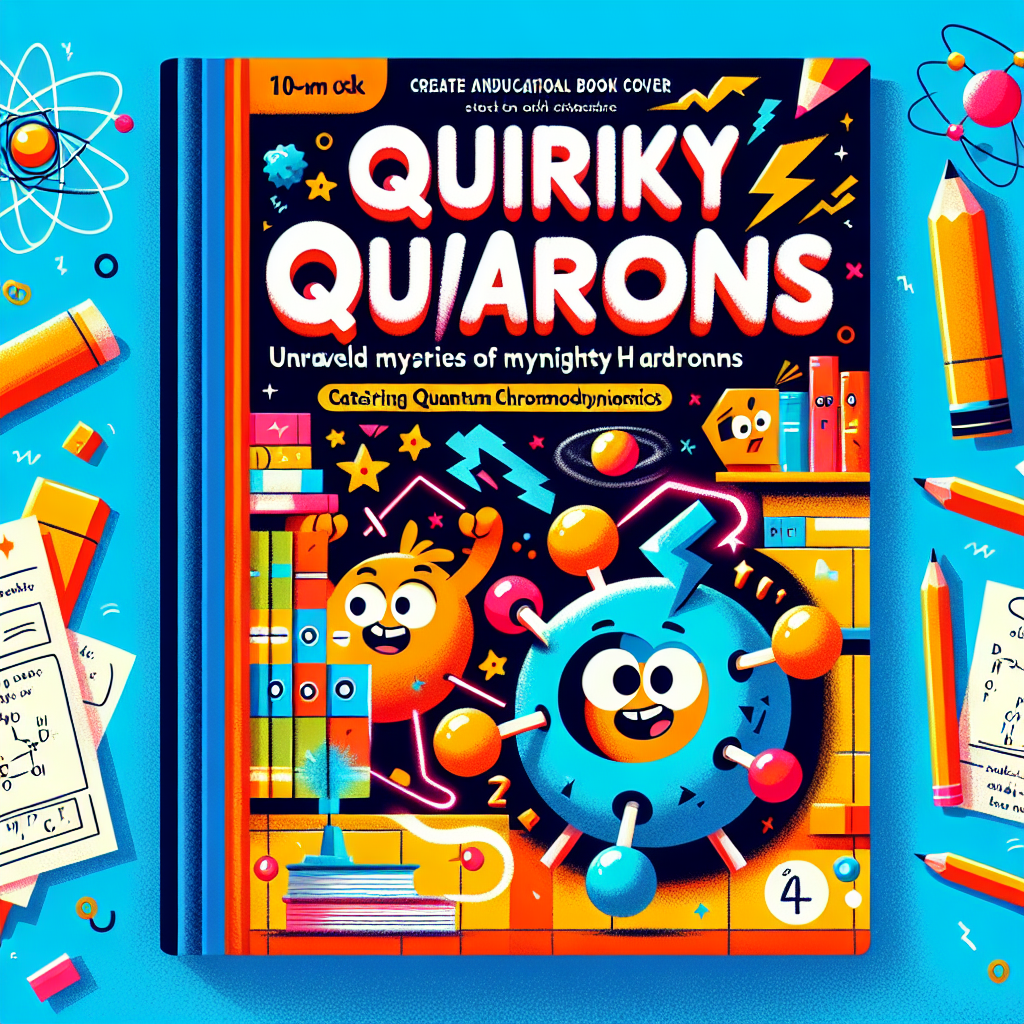

In [55]:
# GENERATE COVER

dalle = DALL_E(key="")
dalle.png(
    name={TEXTBOOK_TITLE},
    dir="outputs",
    prompt=f"Generate a textbook cover, for a textbook titled {TEXTBOOK_TITLE}, about the subject = {USER_SUBJECT} for {USER_LEVEL} students.", 
    size="1024x1024", 
    style="standard",
)


### BUILD MARKDOWN

In [58]:
# MARKDOWN FILE CREATION
toc_data = []
for chapter_title in TEXTBOOK_CHAPTERS:
    sections = TEXTBOOK_SECTIONS[i]
    chapter_toc = {"chapter": chapter_title, "sections": []}
    for section_title in sections:
        chapter_toc["sections"].append(section_title)
    toc_data.append(chapter_toc)

# Build Table of Contents (Markdown)
toc_markdown = "## Table of Contents\n\n"
for chapter in toc_data:
    toc_markdown += f"* [{chapter['chapter']}](#{chapter['chapter'].replace(' ', '-')})\n" 
    for section in chapter['sections']:
        toc_markdown += f"  * [{section}](#{chapter['chapter'].replace(' ', '-')}-{section.replace(' ', '-')})\n"

with open(f"outputs/{TEXTBOOK_TITLE}.md", "w") as f:
    f.write("---\n") 
    f.write(f"{TEXTBOOK_TITLE}\n")
    f.write("---\n\n")  
    f.write(f"![Image description]({TEXTBOOK_TITLE}.png)") 
    f.write(f"\n\n")
    f.write(toc_markdown + "\n\n")  

    # Textbook Structure (Included here)
    for chapter in CHAPTERS_AND_SECTIONS:
        f.write(f"# {chapter['title']}\n\n") 

        for section in chapter['sections']:
            f.write(f"## {section['title']}\n\n")
            f.write(f"{section['introduction']}\n\n")
            f.write(f"{section['content']}\n\n") 

        f.write("### Questions\n\n")
        if 'questions' in chapter:
            for qa_pair in chapter['questions']:  
                f.write(f"**{qa_pair[0]}**\n") 
                f.write("\n\n")
        else:
            f.write("No questions for this chapter.\n\n")

    f.write("\n\n")
    f.write(f"### ANSWER KEY")
    f.write("\n\n")
    for chapter in CHAPTERS_AND_SECTIONS:
        f.write(f"### {chapter['title']}\n\n") 
        if 'questions' in chapter:
            for qa_pair in chapter['questions']:  
                f.write(f"-*{qa_pair[1]}*\n") 
        else:
            f.write("No questions for this chapter.\n\n")


In [59]:
# OPEN IN BROWSER

import webbrowser
import os

markdown_file_path = os.path.abspath(f"outputs/{TEXTBOOK_TITLE}.md")
webbrowser.open(f"file://{markdown_file_path}", new=2)

0:137: execution error: File some object wasn’t found. (-43)


True